In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [4]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Data Exploration

In [5]:
data.shape

(100000, 9)

In [6]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
data.duplicated().sum()

3854

In [8]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [9]:
data['hypertension'] = data['hypertension'].astype('object')
data['heart_disease'] = data['heart_disease'].astype('object')
data['diabetes'] = data['diabetes'].astype('object')

In [10]:
data.dtypes

gender                  object
age                    float64
hypertension            object
heart_disease           object
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                object
dtype: object

### Statistical Analysis

In [11]:
data.describe(include = 'object')

,gender,hypertension,heart_disease,smoking_history,diabetes
count,100000,100000,100000,100000,100000
unique,3,2,2,6,2
top,Female,0,0,No Info,0
freq,58552,92515,96058,35816,91500


In [12]:
data.describe().round(2)

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.00,100000.00,100000.00,100000.00
mean,41.89,27.32,5.53,138.06
std,22.52,6.64,1.07,40.71
min,0.08,10.01,3.50,80.00
25%,24.00,23.63,4.80,100.00
50%,43.00,27.32,5.80,140.00
75%,60.00,29.58,6.20,159.00
max,80.00,95.69,9.00,300.00


### Visualization

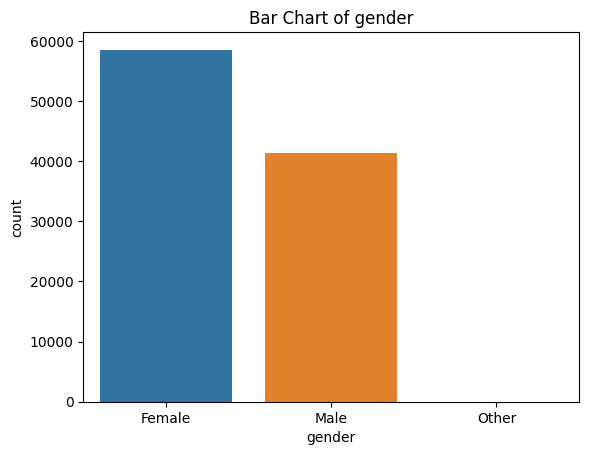

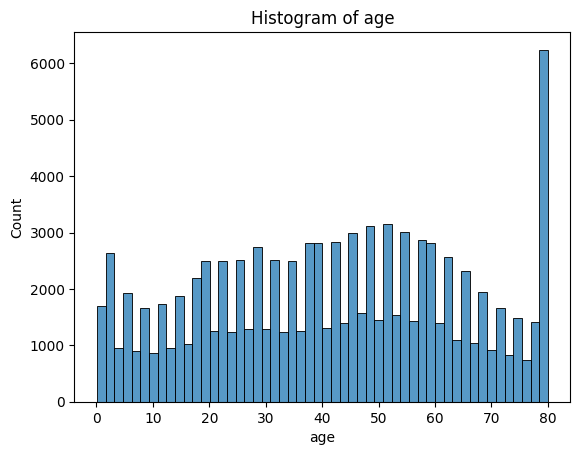

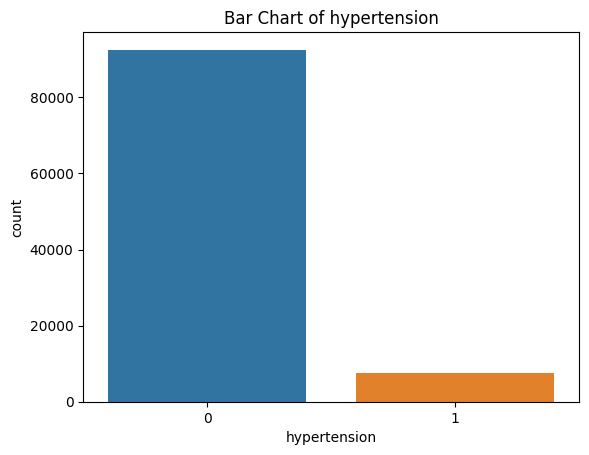

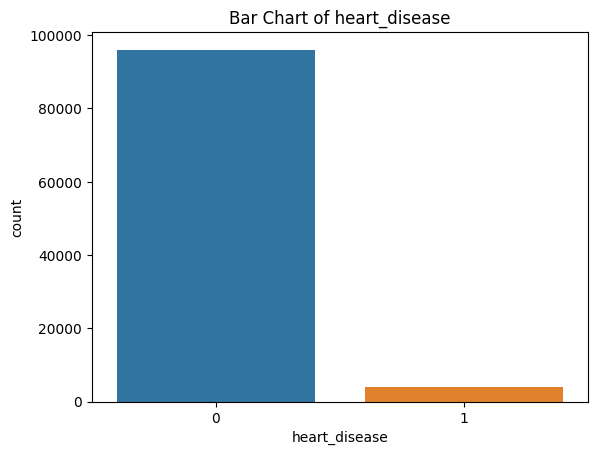

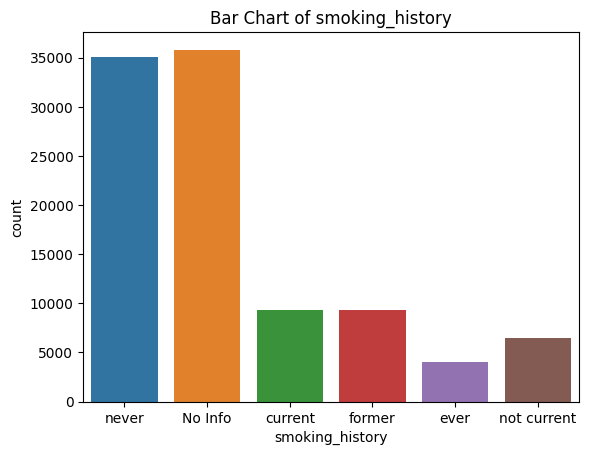

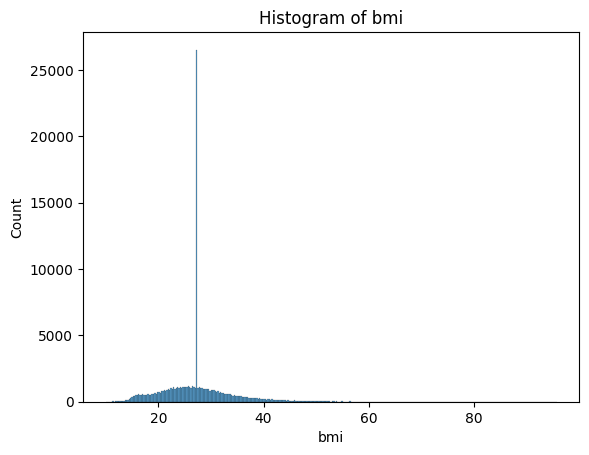

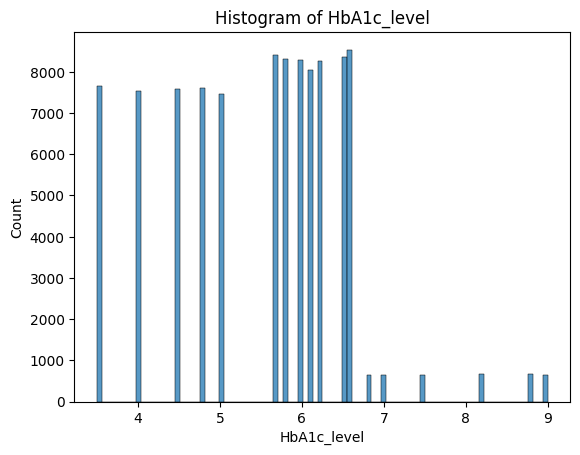

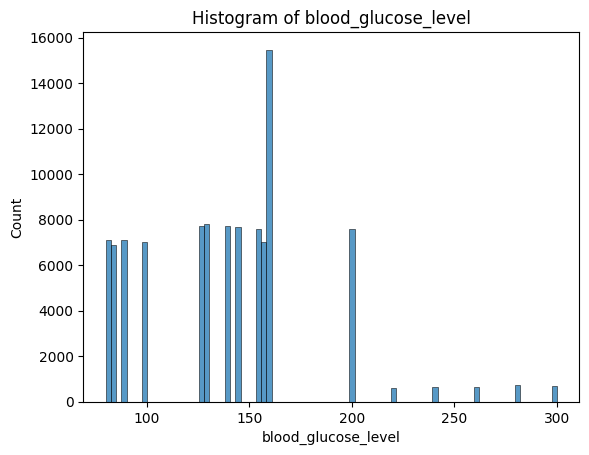

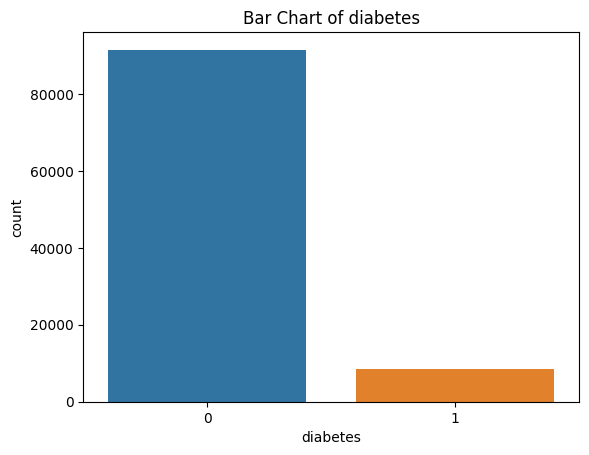

In [ ]:
for column in data.columns:
    # Determine the type of data in the column (e.g., numerical or categorical)
    # and choose an appropriate plot type accordingly

    # For numerical columns:
    if data[column].dtype in ['int64', 'float64']:
        plt.figure()
        sns.histplot(data[column])
        plt.title("Histogram of " + column)
        plt.show()

    # For categorical columns:
    else:
        plt.figure()
        sns.countplot(x = data[column], data = data)
        plt.title("Bar Chart of " + column)
        plt.show()

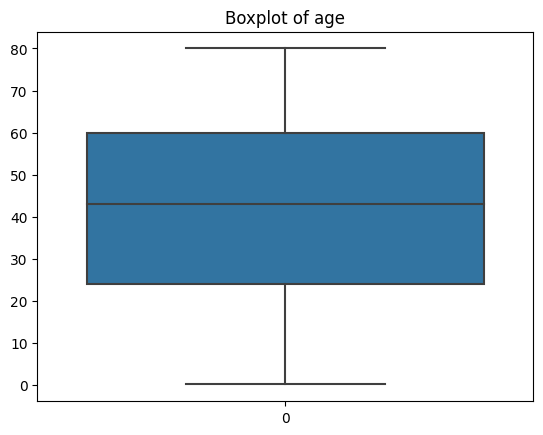

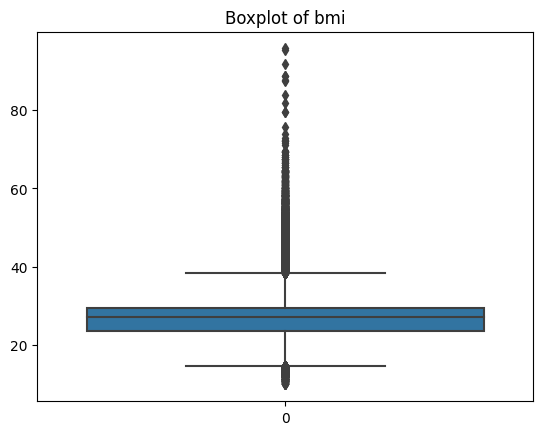

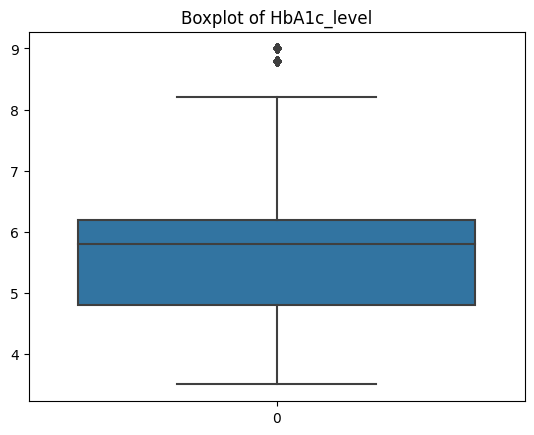

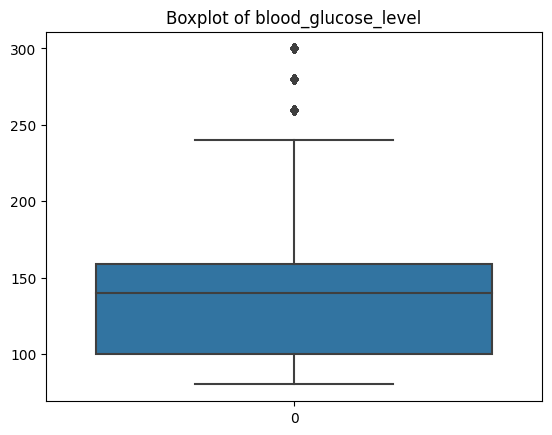

In [ ]:
#using box plot to visualise the numeric data to identify the outliers
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    sns.boxplot(data=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

0    91500
1     8500
Name: diabetes, dtype: int64


<Axes: xlabel='diabetes', ylabel='count'>

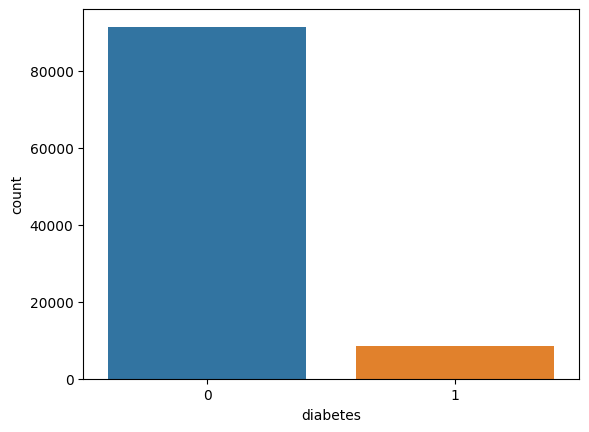

In [ ]:
print(data["diabetes"].value_counts())
sns.countplot(x = 'diabetes', data = data)

## Preprocessing

In [ ]:
data = data.drop_duplicates(inplace=True)

In [ ]:
new_data = data[data['gender'] != 'Other']

# Reset the index of the new DataFrame without creating a new column for the old index
new_data.reset_index(drop=True, inplace=True)

In [ ]:
new_data.shape

(96128, 9)

In [ ]:
new_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Labal Encoding

In [ ]:
new_data['gender'] = pd.factorize(new_data['gender'])[0]
new_data['smoking_history'] = pd.factorize(new_data['smoking_history'])[0]
new_data

<ipython-input-10-68ccfa96bf08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['gender'] = pd.factorize(new_data['gender'])[0]
<ipython-input-10-68ccfa96bf08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['smoking_history'] = pd.factorize(new_data['smoking_history'])[0]


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96123,0,36.0,0,0,1,24.60,4.8,145,0
96124,0,2.0,0,0,1,17.37,6.5,100,0
96125,1,66.0,0,0,3,27.83,5.7,155,0
96126,0,24.0,0,0,0,35.42,4.0,100,0


## Split IV & TV

In [ ]:
from pandas.core.arrays import boolean
x = new_data.drop('diabetes', axis = 1)
y = new_data['diabetes'].astype('int64')

y

0        0
1        0
2        0
3        0
4        0
        ..
96123    0
96124    0
96125    0
96126    0
96127    0
Name: diabetes, Length: 96128, dtype: int64

## Normalization

In [ ]:
x = normalize(x, axis=0)
print("Examples of x Normalised\n", x[:3])

Examples of x Normalised
 [[0.         0.00543781 0.         0.01596581 0.         0.00288648
  0.00377717 0.00313258]
 [0.         0.00367052 0.         0.         0.0016302  0.00313055
  0.00377717 0.00179005]
 [0.00500206 0.00190323 0.         0.         0.         0.00313055
  0.0032621  0.00353534]]


## TV Balancing - Undersampling

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x, y)

0    8482
1    8482
Name: diabetes, dtype: int64


<Axes: xlabel='diabetes', ylabel='count'>

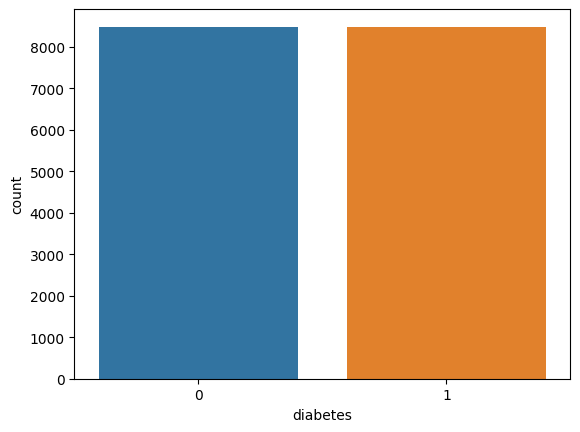

In [ ]:
print(y_nm.value_counts())
sns.countplot(x = y_nm)

## Split Train and Test

In [ ]:
# Creating train,test and validation data
X_train, X_test, y_train, y_test = train_test_split(x_nm, y_nm, test_size = 0.2, random_state = 1)

print("Length of train set: ", X_train.shape, "y:", y_train.shape)
print("Length of test set: ", X_test.shape, "y:", y_test.shape)

Length of train set:  (13571, 8) y: (13571,)
Length of test set:  (3393, 8) y: (3393,)


# Export Clean Dataset

In [ ]:
clean_data = pd.DataFrame(x_nm).copy()
clean_data['8'] = y_nm

clean_data.head()

,0,1,2,3,4,5,6,7,8
0,0.005002,0.005438,0.0,0.0,0.00000,0.003131,0.003491,0.003558,0
1,0.000000,0.005438,0.0,0.0,0.00163,0.003131,0.003777,0.003580,0
2,0.005002,0.005438,0.0,0.0,0.00000,0.003131,0.003491,0.003580,0
3,0.000000,0.005438,0.0,0.0,0.00163,0.003131,0.003777,0.003558,0
4,0.000000,0.005438,0.0,0.0,0.00163,0.003131,0.003720,0.003558,0


In [ ]:
clean_data.to_csv('/content/clean_dataset.csv', index=False)